In [7]:
# Import Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Initial data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## What are the most demanded skills for the top 3 data roles?

Methodology
1. Clean-up skill column into list
2. Calcalute skill counts based on job roles
3. Convert into percentages
4. Plot to visualise findings 

In [8]:
# Filter for US and MY data
df_us = df[df['job_country'] == 'United States']
df_my = df[df['job_country'] == 'Malaysia']

In [9]:
# Explode skill (list type) into individual rows
df_usskills = df_us.explode('job_skills')


In [10]:
# Count the skill grouped by roles
df_usgroup = df_usskills.groupby(['job_title_short', 'job_skills']).size()
# Convert series into a df, and give count a column_name
df_usgroup = df_usgroup.reset_index(name = 'skill_count')
# Sort from highest skill count to lowest
df_usgroup.sort_values(by = 'skill_count', ascending = False, inplace = True)
df_usgroup

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


In [11]:
# Percentage conversion
df_usjobs = df_us['job_title_short'].value_counts().reset_index(name='total_jobs')

# Merge with skill count df table
df_usskills_perc = pd.merge(df_usgroup, df_usjobs, how = 'left', on = 'job_title_short')
df_usskills_perc

,job_title_short,job_skills,skill_count,total_jobs
0,Data Scientist,python,42379,58830
1,Data Analyst,sql,34452,67816
2,Data Scientist,sql,30034,58830
3,Data Analyst,excel,27519,67816
4,Data Scientist,r,26022,58830
...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289
1866,Cloud Engineer,ms access,1,423
1867,Machine Learning Engineer,graphql,1,921
1868,Senior Data Scientist,mariadb,1,12946


In [12]:
# Get skills percentage based on total jobs of that role (e.g. Data Analyst)
df_usskills_perc['skills_percent'] = (df_usskills_perc['skill_count'] / df_usskills_perc['total_jobs']) * 100
df_usskills_perc

,job_title_short,job_skills,skill_count,total_jobs,skills_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


In [13]:
# Get the unique job titles in the sorted skill df
job_titles = df_usgroup['job_title_short'].unique()
# Shortlist top 3 results in alphabetical order
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

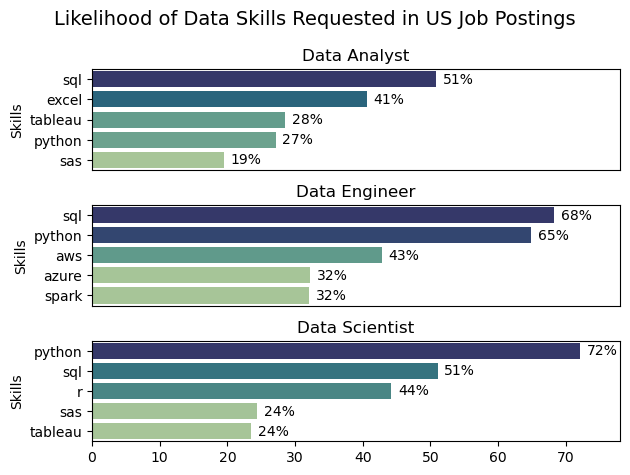

In [14]:
# Plotting time
for i, job_title in enumerate(job_titles):
    # Create plot df based on job title filtered from job_titles & top 5 values
    df_usplot = df_usskills_perc[df_usskills_perc['job_title_short'] == job_title].head(5)

    # Subplots for each job titles
    plt.subplot(len(job_titles), 1, i + 1)  # i + 1 because subplot index starts from 1
    sns.barplot(data=df_usplot, x='skills_percent', y='job_skills', hue = 'skills_percent', palette='crest', legend = False)

    # Customization
    plt.suptitle('Likelihood of Data Skills Requested in US Job Postings', ha = 'center', fontsize = 14)
    plt.title(job_title)
    plt.ylabel('Skills')
    plt.xlabel('')
    plt.xlim(0,78)

    # Add percetage labels
    for n, v in enumerate(df_usplot['skills_percent']):
        plt.text(v + 1, n, f'{v:.0f}%', va = 'center')

    # Remove redundant x-axis ticks expect for the 3rd graph
    if i != 2:
        plt.xticks([])

plt.tight_layout()

## MY Data

Going through the Malaysia-specific filtered data jobs.

In [15]:
# Explode skill (list type) into individual rows
df_myskills = df_my.explode('job_skills')

In [16]:
# Count the skill grouped by roles
df_mygroup = df_myskills.groupby(['job_title_short', 'job_skills']).size()
# Convert series into a df, and give count a column_name
df_mygroup = df_mygroup.reset_index(name = 'skill_count')
# Sort from highest skill count to lowest
df_mygroup.sort_values(by = 'skill_count', ascending = False, inplace = True)
df_mygroup

,job_title_short,job_skills,skill_count
335,Data Analyst,sql,1095
254,Data Analyst,excel,1022
584,Data Scientist,python,830
470,Data Engineer,sql,799
309,Data Analyst,python,738
...,...,...,...
271,Data Analyst,ibm cloud,1
266,Data Analyst,golang,1
1023,Software Engineer,alteryx,1
636,Machine Learning Engineer,assembly,1


In [17]:
# Percentage conversion
df_myjobs = df_my['job_title_short'].value_counts().reset_index(name='total_jobs')

# Merge with MY's skill count df table
df_myskills_perc = pd.merge(df_mygroup, df_myjobs, how = 'left', on = 'job_title_short')
df_myskills_perc

,job_title_short,job_skills,skill_count,total_jobs
0,Data Analyst,sql,1095,2527
1,Data Analyst,excel,1022,2527
2,Data Scientist,python,830,1491
3,Data Engineer,sql,799,1404
4,Data Analyst,python,738,2527
...,...,...,...,...
1175,Data Analyst,ibm cloud,1,2527
1176,Data Analyst,golang,1,2527
1177,Software Engineer,alteryx,1,877
1178,Machine Learning Engineer,assembly,1,163


In [18]:
# Get skills percentage based on total jobs of that role (e.g. Data Analyst)
df_myskills_perc['skills_percent'] = (df_myskills_perc['skill_count'] / df_myskills_perc['total_jobs']) * 100
df_myskills_perc

,job_title_short,job_skills,skill_count,total_jobs,skills_percent
0,Data Analyst,sql,1095,2527,43.332014
1,Data Analyst,excel,1022,2527,40.443213
2,Data Scientist,python,830,1491,55.667337
3,Data Engineer,sql,799,1404,56.908832
4,Data Analyst,python,738,2527,29.204590
...,...,...,...,...,...
1175,Data Analyst,ibm cloud,1,2527,0.039573
1176,Data Analyst,golang,1,2527,0.039573
1177,Software Engineer,alteryx,1,877,0.114025
1178,Machine Learning Engineer,assembly,1,163,0.613497


In [19]:
# Get the unique MY job titles in the sorted skill df
job_titles = df_mygroup['job_title_short'].unique()
# Shortlist top 3 results in alphabetical order
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

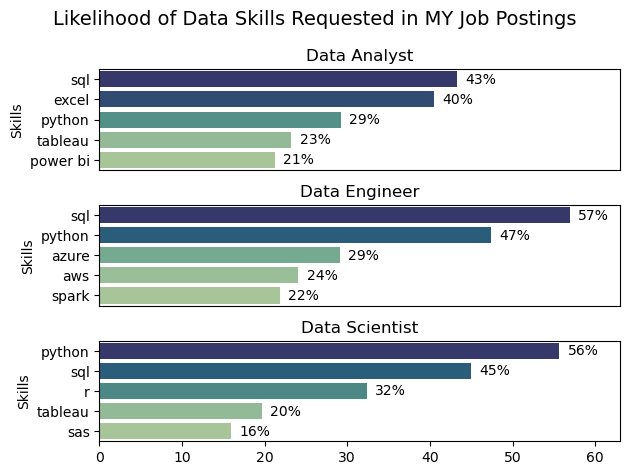

In [21]:
# Plotting time
for i, job_title in enumerate(job_titles):
    # Create plot df based on job title filtered from job_titles & top 5 values
    df_myplot = df_myskills_perc[df_myskills_perc['job_title_short'] == job_title].head(5)

    # Subplots for each job titles
    plt.subplot(len(job_titles), 1, i + 1)  # i + 1 because subplot index starts from 1
    sns.barplot(data=df_myplot, x='skills_percent', y='job_skills', hue = 'skills_percent', palette='crest', legend = False)

    # Customization
    plt.suptitle('Likelihood of Data Skills Requested in MY Job Postings', ha = 'center', fontsize = 14)
    plt.title(job_title)
    plt.ylabel('Skills')
    plt.xlabel('')
    plt.xlim(0,63)

    # Add percetage labels
    for n, v in enumerate(df_myplot['skills_percent']):
        plt.text(v + 1, n, f'{v:.0f}%', va = 'center')

    # Remove redundant x-axis ticks expect for the 3rd graph
    if i != 2:
        plt.xticks([])

plt.tight_layout()